# Simple Guide to Data Cleaning

This tutorial is created for my Medium article.

For more detailed explanation, please refer to my Medium article. Thanks for support.

### Getting Started 

In [2]:
import pandas as pd

In [95]:
df = pd.read_csv("modified_titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime,Unnamed: 13
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1912-04-10 09:42:47,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,-,1,0,PC 17599,71.2833,C85,C,1912-04-10 09:54:01,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1912-04-10 09:55:37,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,113803,53.1000,C123,S,1912-04-10 08:06:51,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1912-04-10 09:10:39,NaN


### Drop unused columns

In [96]:
# df = df.drop(columns="Unnamed: 13")
# or 
df.drop(columns="Unnamed: 13", inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1912-04-10 09:42:47
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,-,1,0,PC 17599,71.2833,C85,C,1912-04-10 09:54:01
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1912-04-10 09:55:37
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,113803,53.1000,C123,S,1912-04-10 08:06:51
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1912-04-10 09:10:39


### Remove Duplicate

In [97]:
df[df.duplicated(keep=False)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S,1912-04-10 08:40:38
18,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S,1912-04-10 08:40:38
29,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S,1912-04-10 08:40:38
55,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29,1,0,2926,26.00,NaN,S,1912-04-10 09:32:51
62,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29,1,0,2926,26.00,NaN,S,1912-04-10 09:32:51
83,81,0,3,"Waelens, Mr. Achille",male,22,0,0,345767,9.00,NaN,S,1912-04-10 09:38:42
97,81,0,3,"Waelens, Mr. Achille",male,22,0,0,345767,9.00,NaN,S,1912-04-10 09:38:42


In [98]:
len(df)

895

In [99]:
df = df.drop_duplicates(keep="first")
len(df)

891

In [100]:
df[df.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime


### Mapping of Data

In [101]:
df["Sex"].unique()

array(['male', 'female', 'm', 'm ', 'M', 'F', 'f'], dtype=object)

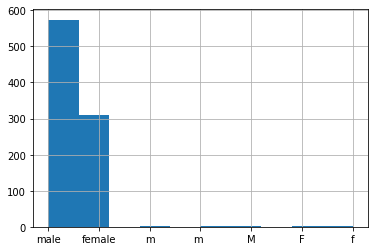

In [102]:
df["Sex"].hist()

In [103]:
df["Sex"] = df["Sex"].map({
    "male": "male",
    "m": "male",
    "m ": "male",
    "M": "male",
    "F": "female",
    "f": "female",
    "female": "female"
})
df["Sex"].unique()

array(['male', 'female'], dtype=object)

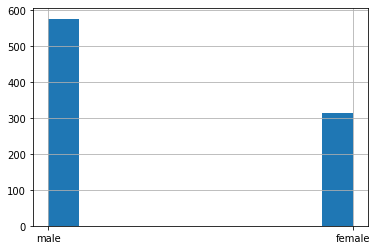

In [104]:
df["Sex"].hist()

### Dealing with null data

In [105]:
df["Age"].head(10) 

0     22
1      -
2     26
3     na
4     35
5    NaN
6     54
7      2
8    NaN
9     14
Name: Age, dtype: object

In [106]:
df['Age'].isnull().head(10) 

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8     True
9    False
Name: Age, dtype: bool

In [115]:
import numpy as np 
df['Age'] = df['Age'].replace('-', np.NaN)
df['Age'] = df['Age'].replace('na', np.NaN)
df["Age"].head(10) 

0     22
1    NaN
2     26
3    NaN
4     35
5    NaN
6     54
7      2
8    NaN
9     14
Name: Age, dtype: object

In [94]:
# option if find out the NA values while reading the data
missing_values = ["na", "-"]
df2 = pd.read_csv("modified_titanic_data.csv", na_values = missing_values)
df2["Age"].head(10) 

0    22.0
1     NaN
2    26.0
3     NaN
4    35.0
5     NaN
6    54.0
7     2.0
8     NaN
9    14.0
Name: Age, dtype: float64

In [130]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Age"].head(10)

0    22
1    28
2    26
3    28
4    35
5    28
6    54
7     2
8    28
9    14
Name: Age, dtype: object